In [20]:
from lightfm import LightFM
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import auc_score

myData = fetch_movielens(min_rating=5.0)
train, test = myData['train'], myData['test']
alpha = 1e-3
epochs = 100

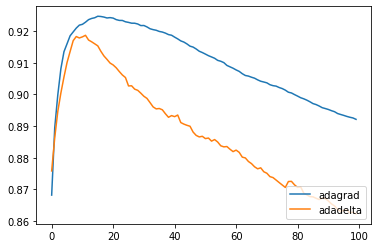

In [21]:
adagrad_warp_model = LightFM(no_components=30,
                            loss='warp',
                            learning_schedule='adagrad',
                            user_alpha=alpha,
                            item_alpha=alpha)

adadelta_warp_model = LightFM(no_components=30,
                            loss='warp',
                            learning_schedule='adadelta',
                            user_alpha=alpha,
                            item_alpha=alpha)

adagrad_warp_auc = []

for epoch in range(epochs):
    adagrad_warp_model.fit_partial(train, epochs=1)
    adagrad_warp_auc.append(auc_score(adagrad_warp_model, test).mean())

adadelta_warp_auc = []

for epoch in range(epochs):
    adadelta_warp_model.fit_partial(train, epochs=1)
    adadelta_warp_auc.append(auc_score(adadelta_warp_model, test).mean())

x = np.arange(len(adagrad_warp_auc))
plt.plot(x, np.array(adagrad_warp_auc))
plt.plot(x, np.array(adadelta_warp_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

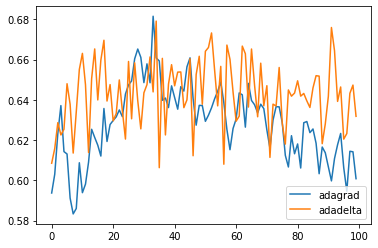

In [22]:
adagrad_bpr_model = LightFM(no_components=30,
                            loss='bpr',
                            learning_schedule='adagrad',
                            user_alpha=alpha,
                            item_alpha=alpha)

adadelta_bpr_model = LightFM(no_components=30,
                            loss='bpr',
                            learning_schedule='adadelta',
                            user_alpha=alpha,
                            item_alpha=alpha)

adagrad_bpr_auc = []

for epoch in range(epochs):
    adagrad_bpr_model.fit_partial(train, epochs=1)
    adagrad_bpr_auc.append(auc_score(adagrad_bpr_model, test).mean())

adadelta_bpr_auc = []

for epoch in range(epochs):
    adadelta_bpr_model.fit_partial(train, epochs=1)
    adadelta_bpr_auc.append(auc_score(adadelta_bpr_model, test).mean())

x = np.arange(len(adagrad_bpr_auc))
plt.plot(x, np.array(adagrad_bpr_auc))
plt.plot(x, np.array(adadelta_bpr_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

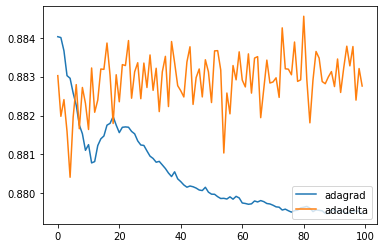

In [23]:
adagrad_logistic_model = LightFM(no_components=30,
                                loss='logistic',
                                learning_schedule='adagrad',
                                user_alpha=alpha,
                                item_alpha=alpha)

adadelta_logistic_model = LightFM(no_components=30,
                                loss='logistic',
                                learning_schedule='adadelta',
                                user_alpha=alpha,
                                item_alpha=alpha)

adagrad_logistic_auc = []

for epoch in range(epochs):
    adagrad_logistic_model.fit_partial(train, epochs=1)
    adagrad_logistic_auc.append(auc_score(adagrad_logistic_model, test).mean())

adadelta_logistic_auc = []

for epoch in range(epochs):
    adadelta_logistic_model.fit_partial(train, epochs=1)
    adadelta_logistic_auc.append(auc_score(adadelta_logistic_model, test).mean())

x = np.arange(len(adagrad_logistic_auc))
plt.plot(x, np.array(adagrad_logistic_auc))
plt.plot(x, np.array(adadelta_logistic_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

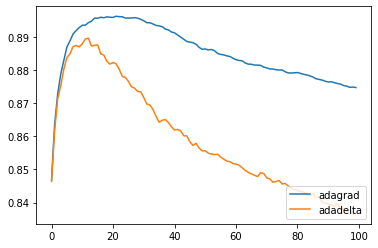

In [24]:
adagrad_warpkos_model = LightFM(no_components=30,
                                loss='warp-kos',
                                learning_schedule='adagrad',
                                user_alpha=alpha,
                                item_alpha=alpha)

adadelta_warpkos_model = LightFM(no_components=30,
                                loss='warp-kos',
                                learning_schedule='adadelta',
                                user_alpha=alpha,
                                item_alpha=alpha)

adagrad_warpkos_auc = []

for epoch in range(epochs):
    adagrad_warpkos_model.fit_partial(train, epochs=1)
    adagrad_warpkos_auc.append(auc_score(adagrad_warpkos_model, test).mean())

adadelta_warpkos_auc = []

for epoch in range(epochs):
    adadelta_warpkos_model.fit_partial(train, epochs=1)
    adadelta_warpkos_auc.append(auc_score(adadelta_warpkos_model, test).mean())

x = np.arange(len(adagrad_warpkos_auc))
plt.plot(x, np.array(adagrad_warpkos_auc))
plt.plot(x, np.array(adadelta_warpkos_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

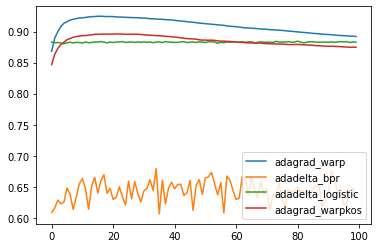

In [29]:
x = np.arange(len(adagrad_warp_auc))

plt.plot(x, np.array(adagrad_warp_auc))

plt.plot(x, np.array(adadelta_bpr_auc))

plt.plot(x, np.array(adadelta_logistic_auc))

plt.plot(x, np.array(adagrad_warpkos_auc))

plt.legend(['adagrad_warp', 'adadelta_bpr', 'adadelta_logistic', 'adagrad_warpkos'], loc='lower right')
plt.show()

In [28]:
from lightfm.evaluation import precision_at_k

model = adagrad_warp_model

print("Train precision: %.2f" % precision_at_k(model, myData['train'], k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, myData['test'], k=5).mean())

def sample_recommendation(model, data, user_ids):


    n_users, n_items = data['train'].shape

    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]

        scores = model.predict(user_id, np.arange(n_items))
        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")

        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")

        for x in top_items[:3]:
            print("        %s" % x)

sample_recommendation(model, myData, [3, 25, 450])


Train precision: 0.65
Test precision: 0.04
User 3
     Known positives:
        Contact (1997)
        Air Force One (1997)
        In & Out (1997)
     Recommended:
        Contact (1997)
        Starship Troopers (1997)
        Cop Land (1997)
User 25
     Known positives:
        Fargo (1996)
        Godfather, The (1972)
        L.A. Confidential (1997)
     Recommended:
        Godfather, The (1972)
        Titanic (1997)
        L.A. Confidential (1997)
User 450
     Known positives:
        Event Horizon (1997)
        Scream (1996)
        Conspiracy Theory (1997)
     Recommended:
        Scream (1996)
        Conspiracy Theory (1997)
        Courage Under Fire (1996)
